# Clasificación No Convecional
## Práctica 0
Carlos Checa Moreno

# Ejercicio 0
Se usará el **make_moons** que genera dos semicírculos intercalados, donde no es eficiente un clasificador lineal.
Esto es un ejemplo ilustrativo en el que todo el dataset se toma como conjunto de entrenamiento y las métricas de evaluación se están evaluando sobre el conjunto de entrenamiento.
**Como tarea realizar el ejercicio, siguiendo los mismos pasos y obteniendo las mismas gráficas para el conjunto de test, pero separando el dataset en conjunto de entrenamiento y de test,  y después aplicar las métricas al conjunto de test.**

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.datasets import make_moons #Importa el dataset make_moons
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split

Primero vamos a dibujar el dataset.

In [2]:
#Para dibujar dataset y la función de decisión (límite entre clase positiva y negativa)
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [4]:
X, y = make_moons(n_samples=500, noise=0.15, random_state=42)

In [5]:
#Separamos en conjunto de entrenamiento y test. Esta celda servirá para hacer la tarea encargada
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20)

In [6]:
X[:2] #Ejemplo de la muestra

array([[ 0.83076711, -0.37213905],
       [ 0.89503242,  0.85830592]])

In [7]:
y[:5] #Ejemplo de la etiqueta

array([1, 0, 1, 0, 0], dtype=int64)

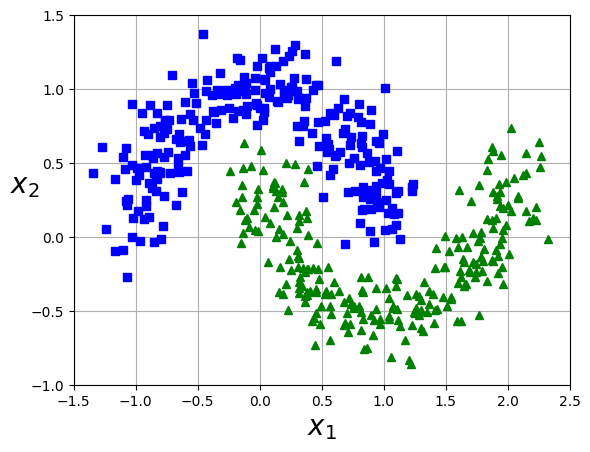

In [8]:
#Función para representar el data set en dos dimensiones
def plot_dataset(X, y, axes):
    #Dibuja con cuadrado azul todas las instancias negativas (y==0)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    #Dibuja con triángulo verde todaslas etiquetas positivas (y==1)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    #Dibuja ejes y sus etiquetas
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
#Dibuja definiendo los intervalos d
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# **Solución Ejercicio 0**

A continuación, se ha realizado una modificación del uso de los diferentes modelos para incorporar el conjunto de test para mejorar la evaluación del modelo.

Al evaluar nuestro modelo con el conjunto de entrenamiento y test podemos interpretar mejor si el modelo está sobreajustandose o infraajustandose al conjunto de entrenamiento. Por ejemplo, si obtenemos un accuracy y una precision de 1 para el conjunto de entrenamiento, pero para el conjunto de test obtenemos de resultados de 0.7 y 0.75, entonces observaríamos que estamos realizando un sobreentramiento y nuestor modelo no está generalizando correctamente.

In [29]:
from sklearn.model_selection import train_test_split

# Dividir en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## **Clasificador lineal**

In [49]:
linear_svc_clasificador = make_pipeline(StandardScaler(), LinearSVC(C=1, loss="hinge"))
# Entrenamiento con el conjunto de entrenamiento
linear_svc_clasificador.fit(X_train, y_train)

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, loss='hinge'))])

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_test = linear_svc_clasificador.predict(X_test)
y_pred_train = linear_svc_clasificador.predict(X_train)
cm_test = confusion_matrix(y_test, y_pred_test)
cm_train = confusion_matrix(y_train, y_pred_train)

In [52]:
print("Confusion Matrix de Train:\n",cm_train)
print("Confusion Matrix de Test:\n",cm_test)

Confusion Matrix de Train:
 [[175  25]
 [ 29 171]]
Confusion Matrix de Test:
 [[38 12]
 [ 4 46]]


In [53]:
print("Resultados para Train:", accuracy_score(y_train, y_pred_train), precision_score(y_train, y_pred_train), recall_score(y_train, y_pred_train))
print("Resultados para Test:",accuracy_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), recall_score(y_test, y_pred_test))

Resultados para Train: 0.865 0.8724489795918368 0.855
Resultados para Test: 0.84 0.7931034482758621 0.92


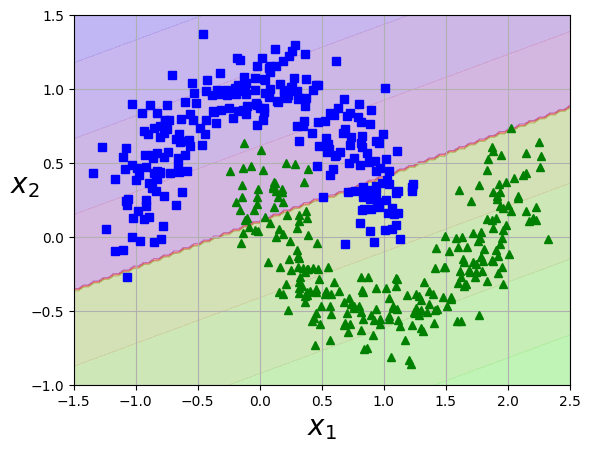

In [56]:
#Función para representar el conjunto de entrenamiento y la función de decisión que representa el límite para 
#decidir entre clase positiva y negativa.
#Recibe como parámetros el clasificador y los extremos de los ejes x e y
def plot_predictions(clf, axes):
    #genera las líneas de los ejes a partir de un array de 100 puntos entre los extremos
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    #Crea la malla rectangular en el gráfico a partir de las líneas anteriores
    x0, x1 = np.meshgrid(x0s, x1s)
    #Con ravel pasa a una dimensión (flatten) x0 y x1 y después los concatena
    #Así genera todos los valores de X para representar la función de decisión
    X = np.c_[x0.ravel(), x1.ravel()]
    #Obtiene todos los valores de y_pred para todos los valores de X a partir del clasificador
    y_pred = clf.predict(X).reshape(x0.shape)
    #Obtiene todos los valores de y_pred para todos los valores de X a partir de la función de decisión
    y_decision = clf.decision_function(X).reshape(x0.shape)
    #Define las regiones que va a rellenar de color
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
plot_predictions(linear_svc_clasificador, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## **Clasificador no lineal basado en svm con un kernel polinómico de grado 3**

In [64]:
polinomico_svc_clasificador = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))
polinomico_svc_clasificador.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [65]:
y_pred_test = polinomico_svc_clasificador.predict(X_test)
y_pred_train = polinomico_svc_clasificador.predict(X_train)
cm_test = confusion_matrix(y_test, y_pred_test)
cm_train = confusion_matrix(y_train, y_pred_train)

In [66]:
print("Confusion Matrix de Train:\n",cm_train)
print("Confusion Matrix de Test:\n",cm_test)

Confusion Matrix de Train:
 [[199   1]
 [  1 199]]
Confusion Matrix de Test:
 [[50  0]
 [ 0 50]]


In [67]:
print("Resultados para Train:", accuracy_score(y_train, y_pred_train), precision_score(y_train, y_pred_train), recall_score(y_train, y_pred_train))
print("Resultados para Test:",accuracy_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), recall_score(y_test, y_pred_test))

Resultados para Train: 0.995 0.995 0.995
Resultados para Test: 1.0 1.0 1.0


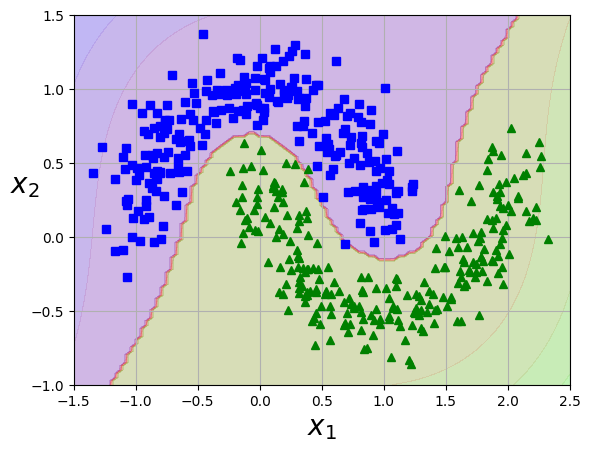

In [68]:
plot_predictions(polinomico_svc_clasificador, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## **Clasificador no lineal basado en svm con un kernel polinómico de grado 6**

In [30]:
polinomico_svc_clasificador10 = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=10, coef0=1, C=5))
# Entrenamiento del modelo con el conjunto de entrenamiento
polinomico_svc_clasificador10.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_test = polinomico_svc_clasificador10.predict(X_test)
y_pred_train = polinomico_svc_clasificador10.predict(X_train)
cm_test = confusion_matrix(y_test, y_pred_test)
cm_train = confusion_matrix(y_train, y_pred_train)

In [45]:
print("Confusion Matrix de Train:\n",cm_train)
print("Confusion Matrix de Test:\n",cm_test)

Confusion Matrix de Train:
 [[200   0]
 [  0 200]]
Confusion Matrix de Test:
 [[49  1]
 [ 0 50]]


In [47]:
print("Resultados para Train:", accuracy_score(y_train, y_pred_train), precision_score(y_train, y_pred_train), recall_score(y_train, y_pred_train))
print("Resultados para Test:",accuracy_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), recall_score(y_test, y_pred_test))

Resultados para Train: 1.0 1.0 1.0
Resultados para Test: 0.99 0.9803921568627451 1.0


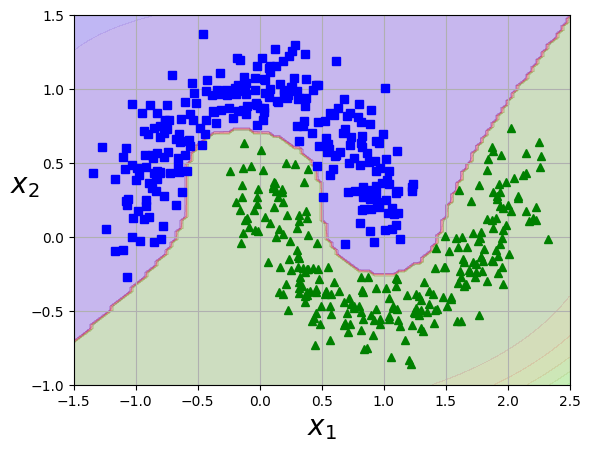

In [48]:
plot_predictions(polinomico_svc_clasificador10, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()